# EV Market Segmentation

Importing necessary Libraries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.ticker import FuncFormatter

Loading all Datasets

In [192]:
df1=pd.read_csv("C:/Users/Nikhil G/Desktop/EV Dataset nikhil/State wise data.csv")
print('state wise EV Distribution Data in India')
df1.head()

state wise EV Distribution Data in India


,S.no,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,total-charging-stations,Electric,Non-Electric
0,1,Andaman and Nicobar Island,11,38,101,0,40,0,0,0,7,4,190,161258
1,2,Andhra Pradesh,8003,59551,314,11,26,0,0,0,8,601,67905,16553509
2,3,Arunachal Pradesh,19,0,9,0,0,0,0,0,1,41,28,303673
3,4,Assam,10721,107519,2161,7,15,0,0,0,2,278,120423,5312457
4,5,Bihar,21003,139906,114,11,26,0,0,0,8,347,161060,11631081


In [193]:
df2=pd.read_csv("C:/Users/Nikhil G/Desktop/EV Dataset nikhil/Year wise Growth of EV.csv")
print('Year wise EV Growth Data in India')
df2

Year wise EV Growth Data in India


,Year,Total Count
0,2014,2391
1,2015,7790
2,2016,49622
3,2017,86720
4,2018,129125
5,2019,165461
6,2020,123092
7,2021,327976
8,2022,1015196
9,2023,2369810


In [194]:
df3=pd.read_csv("C:/Users/Nikhil G/Desktop/EV Dataset nikhil/EV Maker by Place.csv")
print('state wise EV Manufacturer Data in India')
df3.head()

state wise EV Manufacturer Data in India


,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


Exploratory Data Analysis

In [167]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   S.no                            34 non-null     int64 
 1   State Name                      34 non-null     object
 2   Two Wheeler                     34 non-null     int64 
 3   Three Wheeler                   34 non-null     int64 
 4   Four Wheeler                    34 non-null     int64 
 5   Goods Vehicles                  34 non-null     int64 
 6   Public Service Vehicle          34 non-null     int64 
 7   Special Category Vehicles       34 non-null     int64 
 8   Ambulance/Hearses               34 non-null     int64 
 9   Construction Equipment Vehicle  34 non-null     int64 
 10  Other                           34 non-null     int64 
 11  total-charging-stations         34 non-null     int64 
 12  Electric                        34 non-null     int6

In [168]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         10 non-null     int64
 1   Total Count  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [169]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [196]:
print('state wise EV Distribution Data in India-----',df1.shape)
print('Year wise EV Growth Data in India-----',df2.shape)
print('state wise EV Manufacturer Data in India-----',df3.shape)

state wise EV Distribution Data in India----- (34, 14)
Year wise EV Growth Data in India----- (10, 2)
state wise EV Manufacturer Data in India----- (62, 3)


Visualisations

<Figure size 1500x800 with 0 Axes>

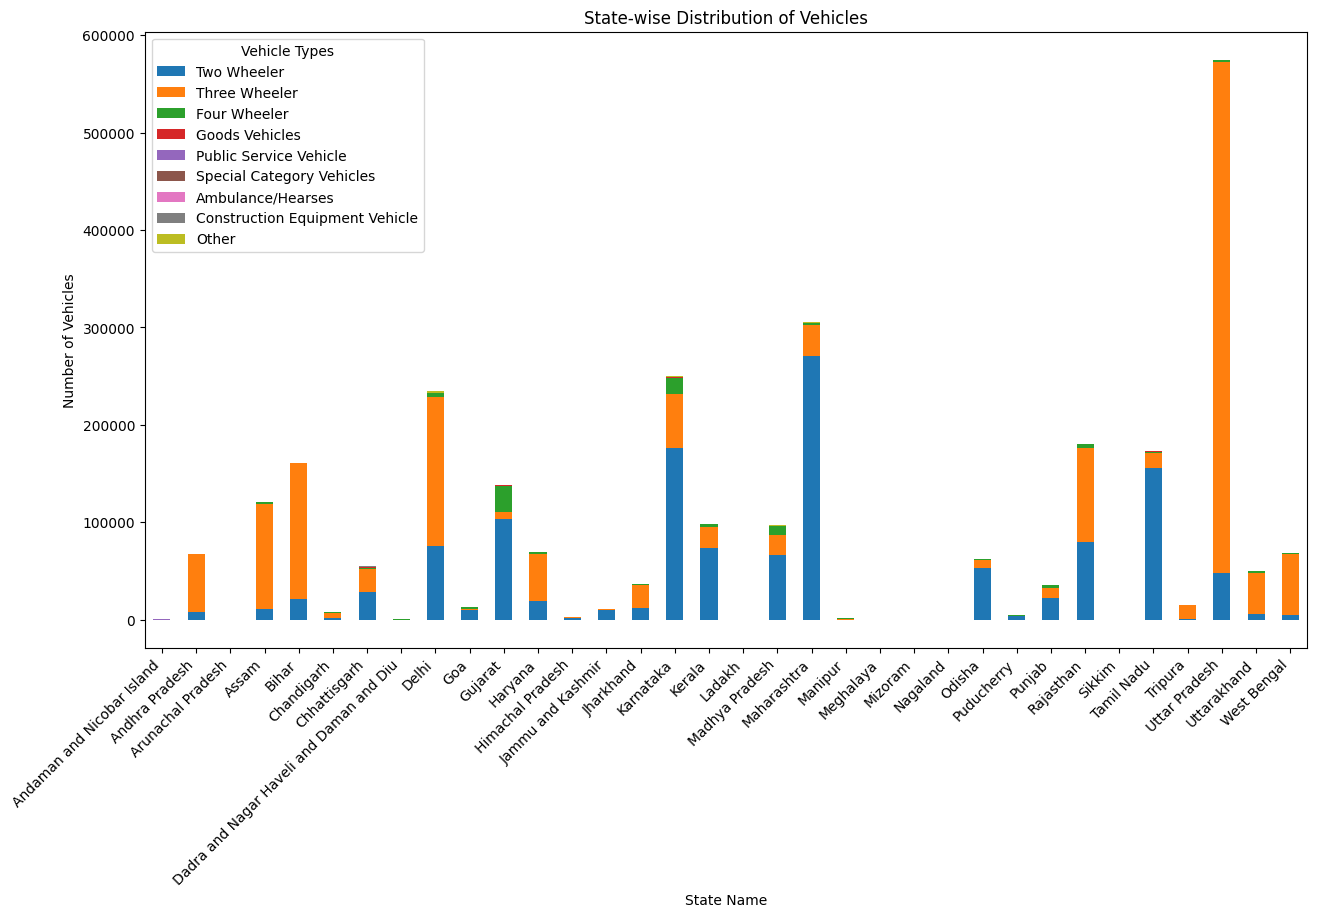

In [203]:
# State-wise Distribution of Vehicles
vehicle_types = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
                'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses',
                'Construction Equipment Vehicle', 'Other']
    
state_vehicle_distribution = df1.groupby('State Name')[vehicle_types].sum().reset_index()
    
plt.figure(figsize=(15, 8))
state_vehicle_distribution.set_index('State Name').plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('State-wise Distribution of Vehicles')
plt.xlabel('State Name')
plt.ylabel('Number of Vehicles')
plt.legend(title='Vehicle Types')
plt.xticks(rotation=45, ha='right')
plt.show()



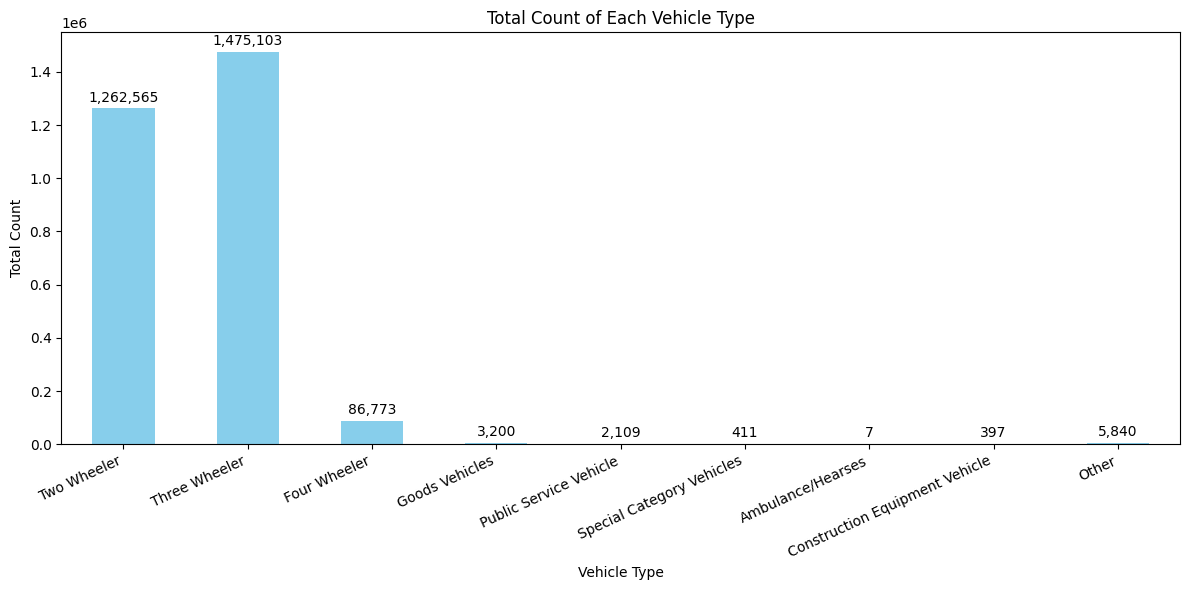

In [222]:
# Vehicle Type Count and Bar Graph
def vehicle_type_count_bar_graph(df):
    vehicle_types = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles',
                     'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses',
                     'Construction Equipment Vehicle', 'Other']
    
    vehicle_type_counts = df[vehicle_types].sum()

    plt.figure(figsize=(12, 6))
    vehicle_type_counts.plot(kind='bar', color='skyblue')
    plt.title('Total Count of Each Vehicle Type')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Total Count')
    plt.xticks(rotation=25, ha='right')
    
    # Displaying the count on top of each bar
    for i, count in enumerate(vehicle_type_counts):
        plt.text(i, count + max(vehicle_type_counts) * 0.01, f'{count:,}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

vehicle_type_count_bar_graph(df1)


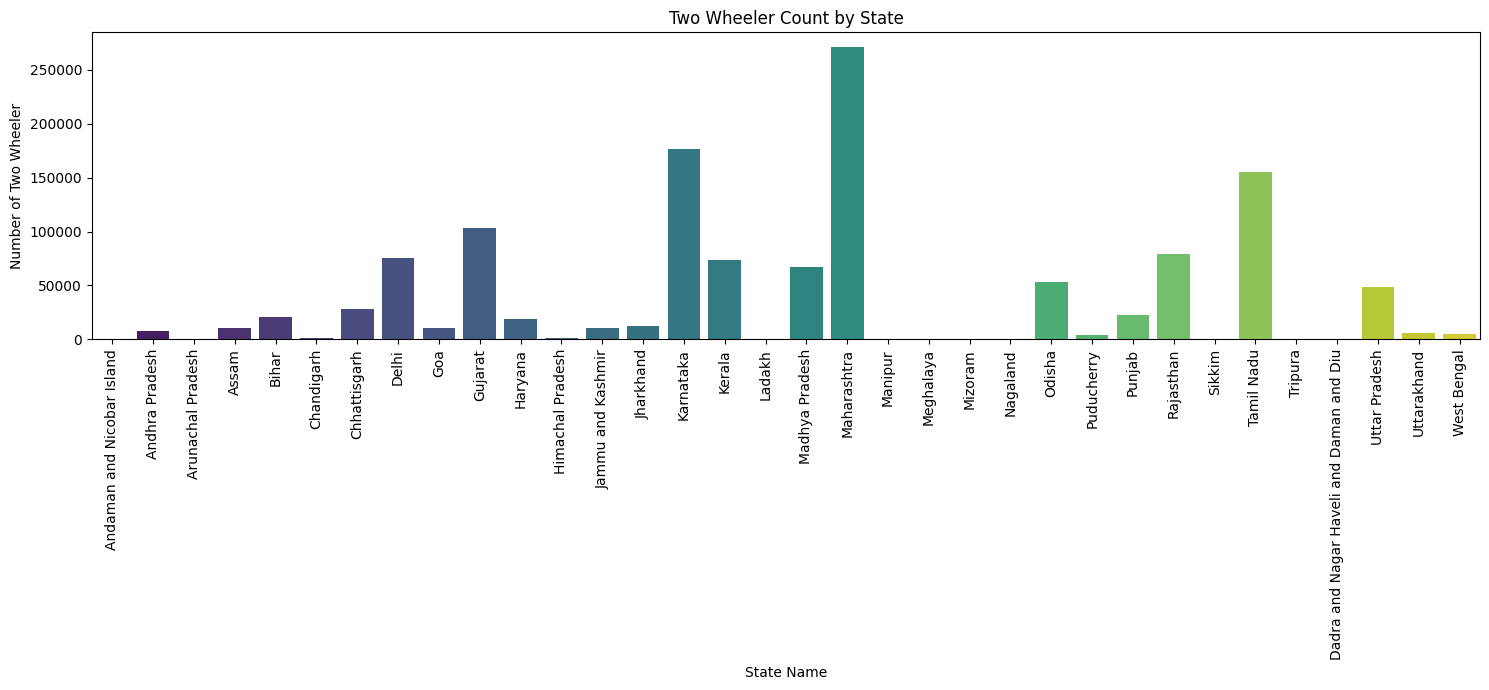

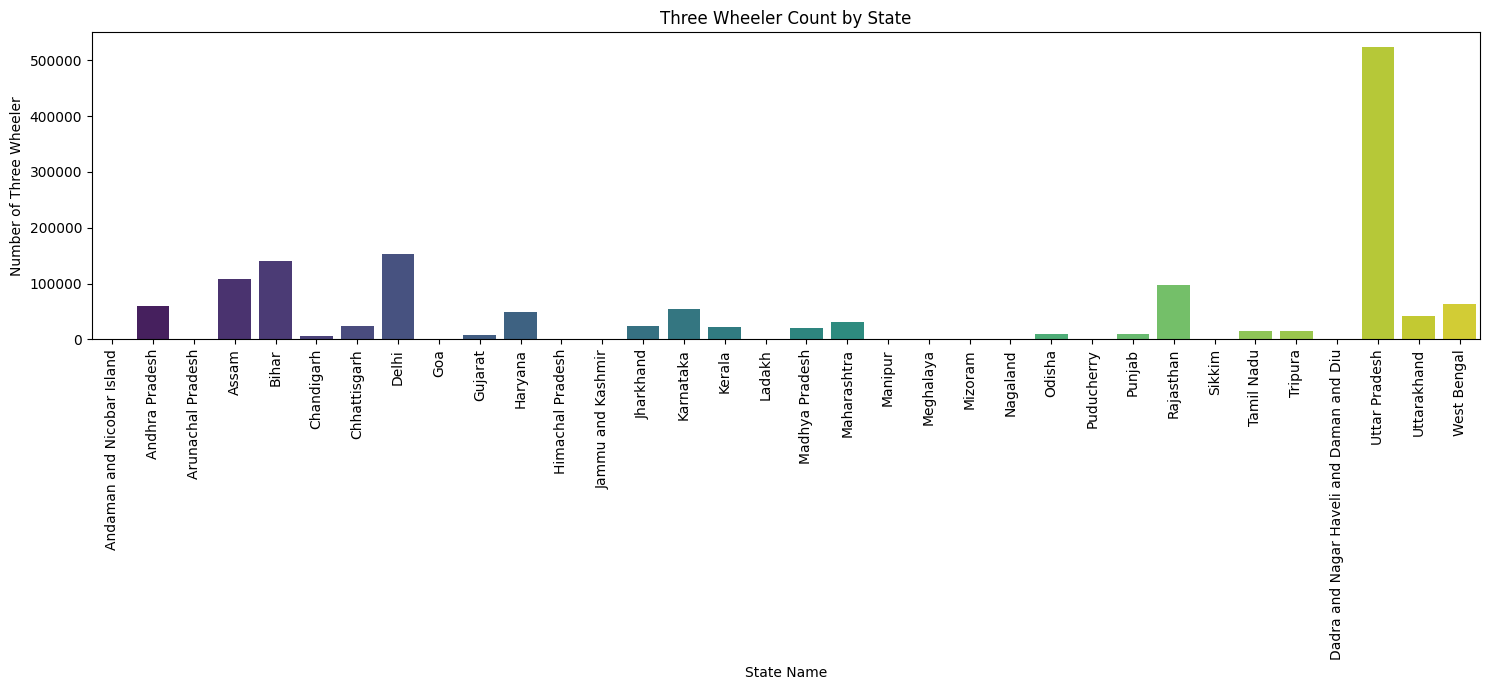

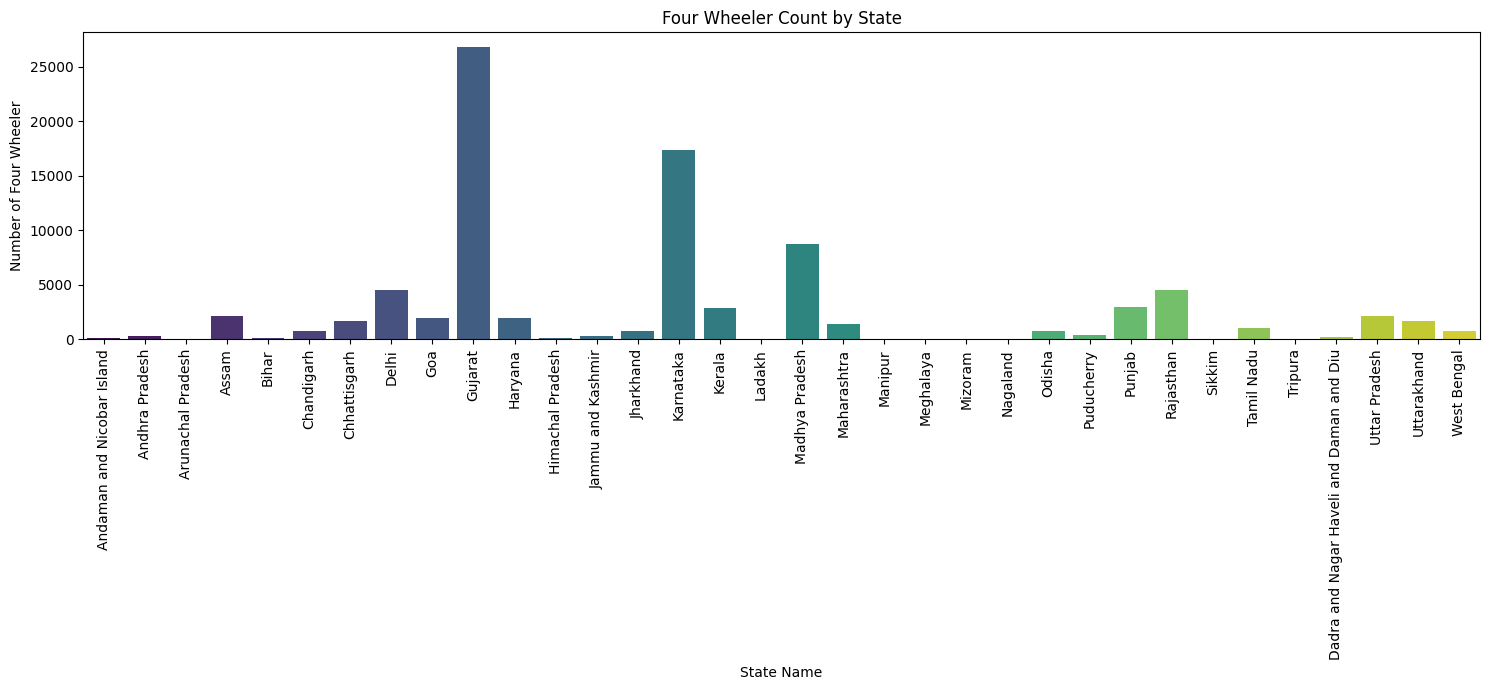

In [227]:
#Distribution of each vehicle type by state
vehicle_types = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler']

for vehicle_type in vehicle_types:
    plt.figure(figsize=(15, 7))
    sns.barplot(x='State Name', y=vehicle_type, data=df1, palette='viridis')
    plt.title(f'{vehicle_type} Count by State')
    plt.xlabel('State Name')
    plt.ylabel(f'Number of {vehicle_type}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

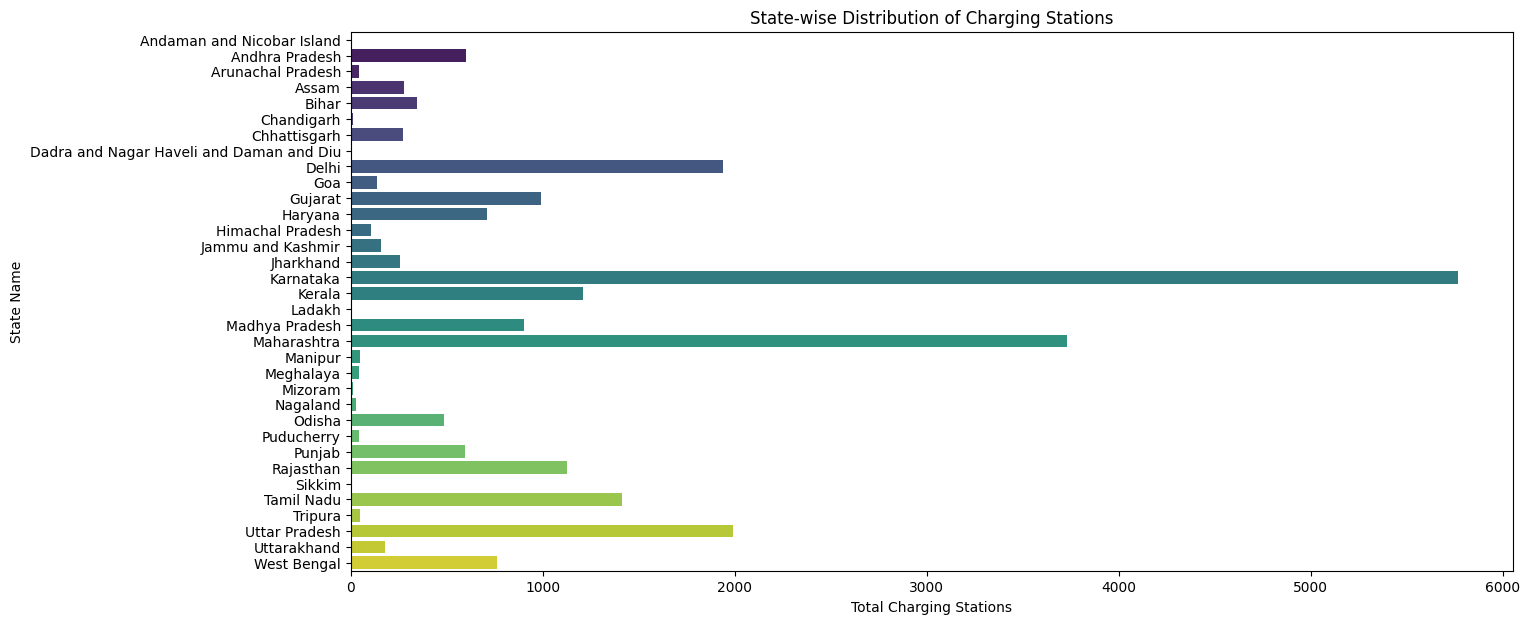

In [230]:
# Analysis of Charging Infrastructure by State
charging_stations = df1[['State Name', 'total-charging-stations']].groupby('State Name').sum()

plt.figure(figsize=(15, 7))
sns.barplot(x='total-charging-stations', y='State Name', data=charging_stations, palette='viridis')
plt.title('State-wise Distribution of Charging Stations')
plt.xlabel('Total Charging Stations')
plt.ylabel('State Name')
plt.show()

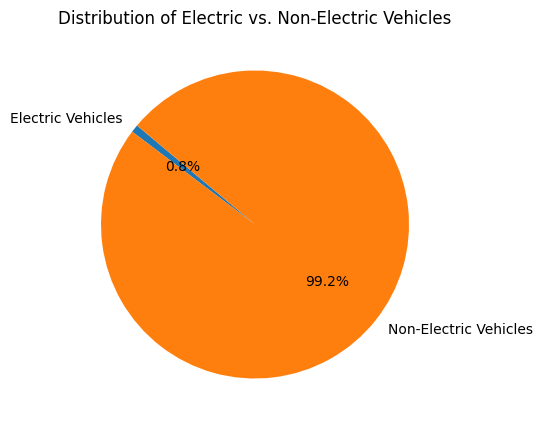

In [236]:
# Distribution of electric and non-electric vehicles
total_electric = df1['Electric'].sum()
total_non_electric = df1['Non-Electric'].sum()

labels = ['Electric Vehicles', 'Non-Electric Vehicles']
sizes = [total_electric, total_non_electric]
colors = ['#1f77b4', '#ff7f0e']  

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Electric vs. Non-Electric Vehicles')
plt.show()

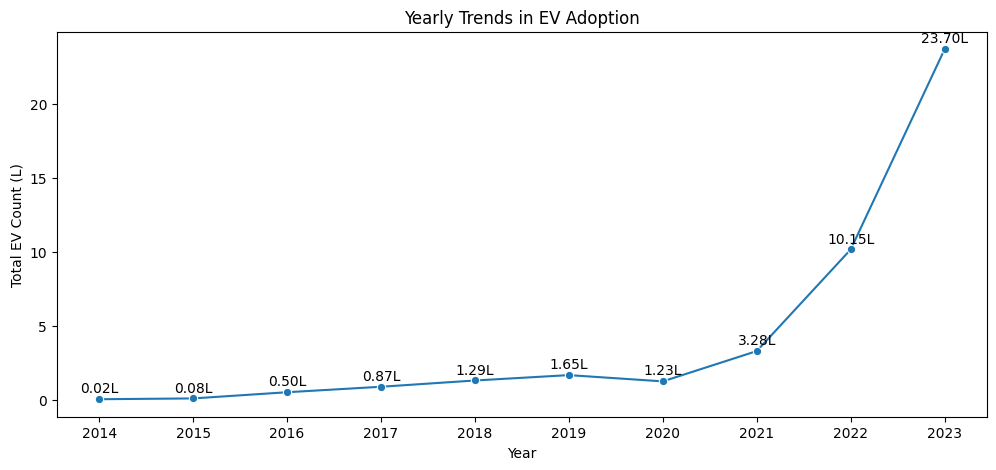

In [249]:
# Plot Yearly Trends in EV Adoption
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Total Count (L)', data=df2, marker='o')

years = df2['Year'].unique()  
df2['Total Count (L)'] = df2['Total Count'] / 100000
for i, row in df2.iterrows():
    plt.text(row['Year'], row['Total Count (L)'] + df2['Total Count (L)'].max() * 0.01, 
             f'{row["Total Count (L)"]:.2f}L', ha='center', va='bottom')

plt.title('Yearly Trends in EV Adoption')
plt.xticks(ticks=years)  
plt.xlabel('Year')
plt.ylabel('Total EV Count (L)')
plt.show()

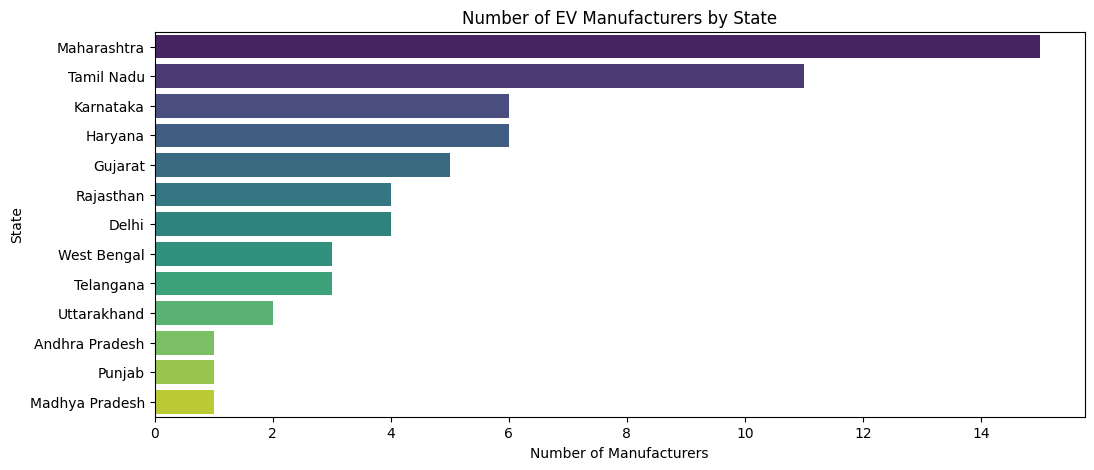

In [251]:
#Number of EV Manufactures by state
state_manufacturer_count = df3.groupby('State').size().reset_index(name='Number of Manufacturers')
state_manufacturer_count = state_manufacturer_count.sort_values(by='Number of Manufacturers', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x='Number of Manufacturers', y='State', data=state_manufacturer_count, palette='viridis')
plt.title('Number of EV Manufacturers by State')
plt.xlabel('Number of Manufacturers')
plt.ylabel('State')
plt.show()

Forecasting the Market Trend

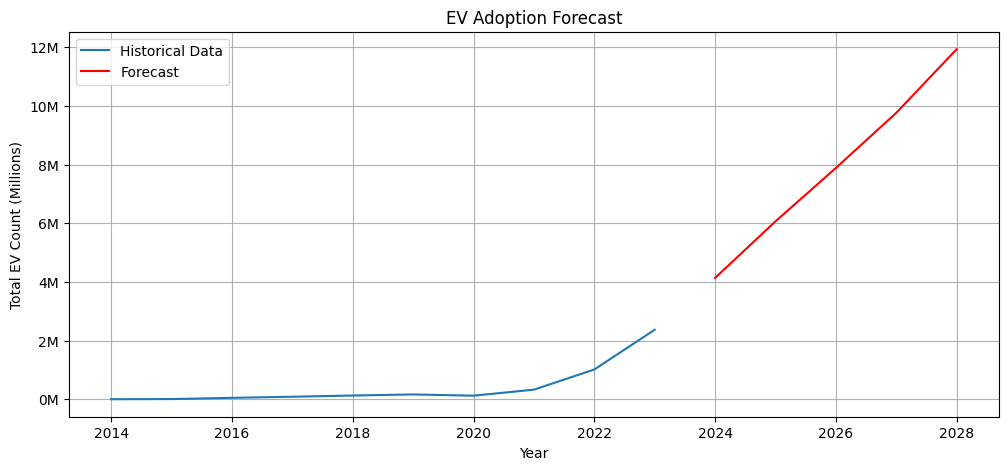

In [253]:
ts_data = df2.set_index('Year')['Total Count']

# ARIMA Model
model = ARIMA(ts_data, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=5)
forecast_index = range(ts_data.index[-1] + 1, ts_data.index[-1] + 6)

def millions(x, pos):
    return f'{int(x * 1e-6)}M'

# Plotting the Results
plt.figure(figsize=(12,5))
plt.plot(ts_data, label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('EV Adoption Forecast')
plt.xlabel('Year')
plt.ylabel('Total EV Count (Millions)')
plt.legend()
plt.grid(True)
formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()